In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
import numpy as np
import jax
import matplotlib.pyplot as plt
from deeprte.data import pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import scipy.io as sio

mat = sio.loadmat("/workspaces/deeprte/data/raw_data/train/g0.1-sigma_a3-sigma_t6/g0.1-sigma_a3-sigma_t6.mat")

In [6]:
# Path to the dataset
DATA_DIR = "/workspaces/deeprte/data/raw_data/train/g0.1-sigma_a3-sigma_t6"
DATA_NAME = ["g0.1-sigma_a3-sigma_t6.mat"]

data_pipeline = pipeline.DataPipeline(DATA_DIR, DATA_NAME)
raw_feature_dict = data_pipeline.process()
num_examples = raw_feature_dict["shape"]["num_examples"]

jax.tree_map(lambda x: x.shape, raw_feature_dict["functions"])

{'boundary': (1000, 160, 12),
 'boundary_scattering_kernel': (1000, 160, 12, 24),
 'psi_label': (1000, 40, 40, 24),
 'scattering_kernel': (1000, 40, 40, 24, 24),
 'self_scattering_kernel': (1000, 24, 24),
 'sigma': (1000, 40, 40, 2)}

In [15]:
sk = raw_feature_dict["functions"]["self_scattering_kernel"]

In [16]:
np.allclose(sk[1],sk[2])

False

In [11]:
i = 200

In [12]:
feature_dict = {
    "functions": jax.tree_map(
        lambda x: x[i : i + 1], raw_feature_dict["functions"]
    ),
    "grid": raw_feature_dict["grid"],
    "shape": raw_feature_dict["shape"],
}

In [13]:
psi_shape = feature_dict["functions"]["psi_label"].shape
r = feature_dict["grid"]["position_coords"].reshape(*psi_shape[1:-1], -1)
psi_label = feature_dict["functions"]["psi_label"]
phi_label = np.sum(
    psi_label * feature_dict["grid"]["velocity_weights"], axis=-1
)

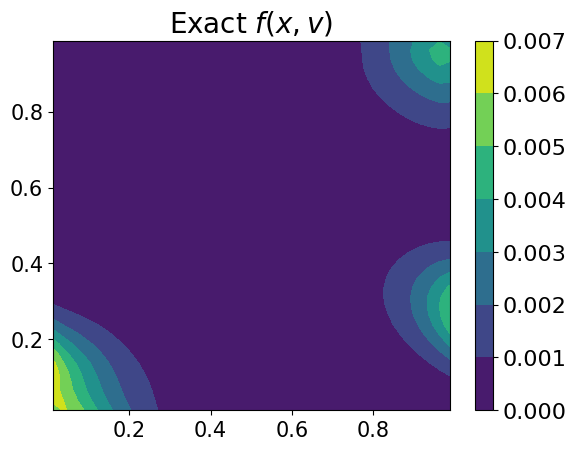

In [14]:
fig, axs = plt.subplots()
fig.subplots_adjust(hspace=0.3)

# fig = px.density_contour(phi_label)
# fig.show()

cs_1 = axs.contourf(
    r[..., 0], r[..., 1], phi_label[0]
)
axs.set_title(r"Exact $f(x,v)$", fontsize=20)
axs.tick_params(axis="both", labelsize=15)
cbar = fig.colorbar(cs_1)
cbar.ax.tick_params(labelsize=16)